<a href="https://colab.research.google.com/github/tqnhu2407/Image_Compression/blob/master/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import PIL
import PIL.Image
import matplotlib.pyplot as plt
import numpy as np

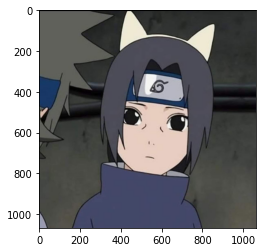

In [2]:
im = PIL.Image.open('Itachi neko.jpg')
plt.imshow(np.array(im))

In [3]:
im = np.array(im)
im = im / 255
pixels = np.reshape(im, (im.shape[0]*im.shape[1], 3))

In [4]:
def distance(p1, p2):
    
    # Manhattan distance
    dist = abs(p1[0] - p2[0]) + abs(p1[1] - p2[1]) + abs(p1[2] - p2[2])
    return dist

In [5]:
def init_means(pixels, clusters):
    
    # Initialize the list means
    means = np.zeros((clusters, 3))
    
    # Randomly select k distinct pixels to become the 'means'
    # Each pixel has 3 color channels\n",
    for k in range(clusters):
        
        rand_pixel = int(np.random.random(1)*pixels.shape[0])
        means[k] = pixels[rand_pixel]
    
    return means

In [6]:
def kmeans(pixels, means, clusters, max_iter):
    
    labels = []
    # Just an iterator
    for i in range(max_iter):

        classes = []
        for k in range(clusters):
            classes.append([])

        # Visit each pixel
        for pixel in pixels:
            
            # A list of distances btw the current pixel to the means
            distances = [distance(pixel, mean) for mean in means]
            # The cluster that has the min distance
            k = distances.index(min(distances))
            # The current pixel is now added
            # to the class number k
            if i < max_iter - 1:
                classes[k].append(pixel)
            else:
                # Label the pixel
                labels.append(k) # labels[i] = k <=> pixel i belongs to cluster k

        if i < max_iter - 1:
            for k in range(clusters):
                means[k] = np.average(classes[k], axis=0)
    
    return means*255, np.array(labels)

In [7]:
def compress_image(im, means, labels): # labels: list

    # recovering the compressed image by 
    # assigning each pixel to its corresponding centroid. 
    centroid = np.array(means, dtype=int)
    recovered = centroid[labels]

    # getting back the 3d matrix (row, col, rgb(3)) 
    recovered = np.reshape(recovered, (im.shape[0], im.shape[1], 3))
 
    plt.imshow(np.array(recovered))

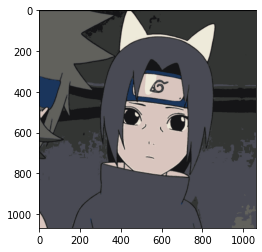

In [8]:
clusters = 7
means = init_means(pixels, clusters)
max_iter = 10

means, labels = kmeans(pixels, means, clusters, max_iter)
compress_image(im, means, labels)